_L'objectif de ce notebook est d'évaluer la qualité afin de se focaliser sur la partie la plus peuplée des données statitiques des tournois de Tennis de 1993 jusqu'au 2017._

In [1]:
#chargement de librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
low_memory=False
from pylab import rcParams
import numpy as np
import seaborn as sns

In [2]:
#modification des paramètres
rcParams['figure.figsize'] = 40, 20
SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 35
HUGE_SIZE=60
plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    
plt.rc('ytick', labelsize=MEDIUM_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)  


# Chargement des données

In [3]:
df_apt=pd.read_csv('ATP.csv',sep=',',decimal='.',low_memory=False)

# Exploration initiale des données

In [4]:
print('nombre de observations:'+str(df_apt.shape[0])+ ' ; nombre de variables (features): '+str(df_apt.shape[1]))

nombre de observations:163966 ; nombre de variables (features): 49


In [5]:
df_apt.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [6]:
[ 'surface', 'draw_size', 'tourney_level',
       'match_num', 
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age']

['surface',
 'draw_size',
 'tourney_level',
 'match_num',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age']

In [7]:
df_apt.iloc[:, 0:10].tail(n=1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry
163965,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4,D,20170203,5,105449,NaN,NaN


In [8]:
df_apt.iloc[:, 10:20].tail(n=1)

,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry
163965,Steve Johnson,R,188,USA,27.1019849418,31,1345,134472,NaN,NaN


In [9]:
df_apt.iloc[:, 20:30].tail(n=1)

,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round
163965,Antoine Bellier,U,NaN,SUI,20.2847364819,598,52,6-4 6-3,3,RR


In [10]:
df_apt.iloc[:, 30:45].tail(n=1)

,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon
163965,60,5,0,46,34,26,9,10,3,4,1,2,54,27,15


In [11]:
df_apt.iloc[:, 45:-1].tail(n=1)

,l_2ndWon,l_SvGms,l_bpSaved
163965,15,9,2


# Evaluation de la complétude des données

In [12]:
# évaluation de la disponibilité des données par variable et par observation
max_of_rows=df_apt.shape[0]
df_availabilty=pd.DataFrame(100*df_apt.count()/max_of_rows,columns=['data_availabilty'])

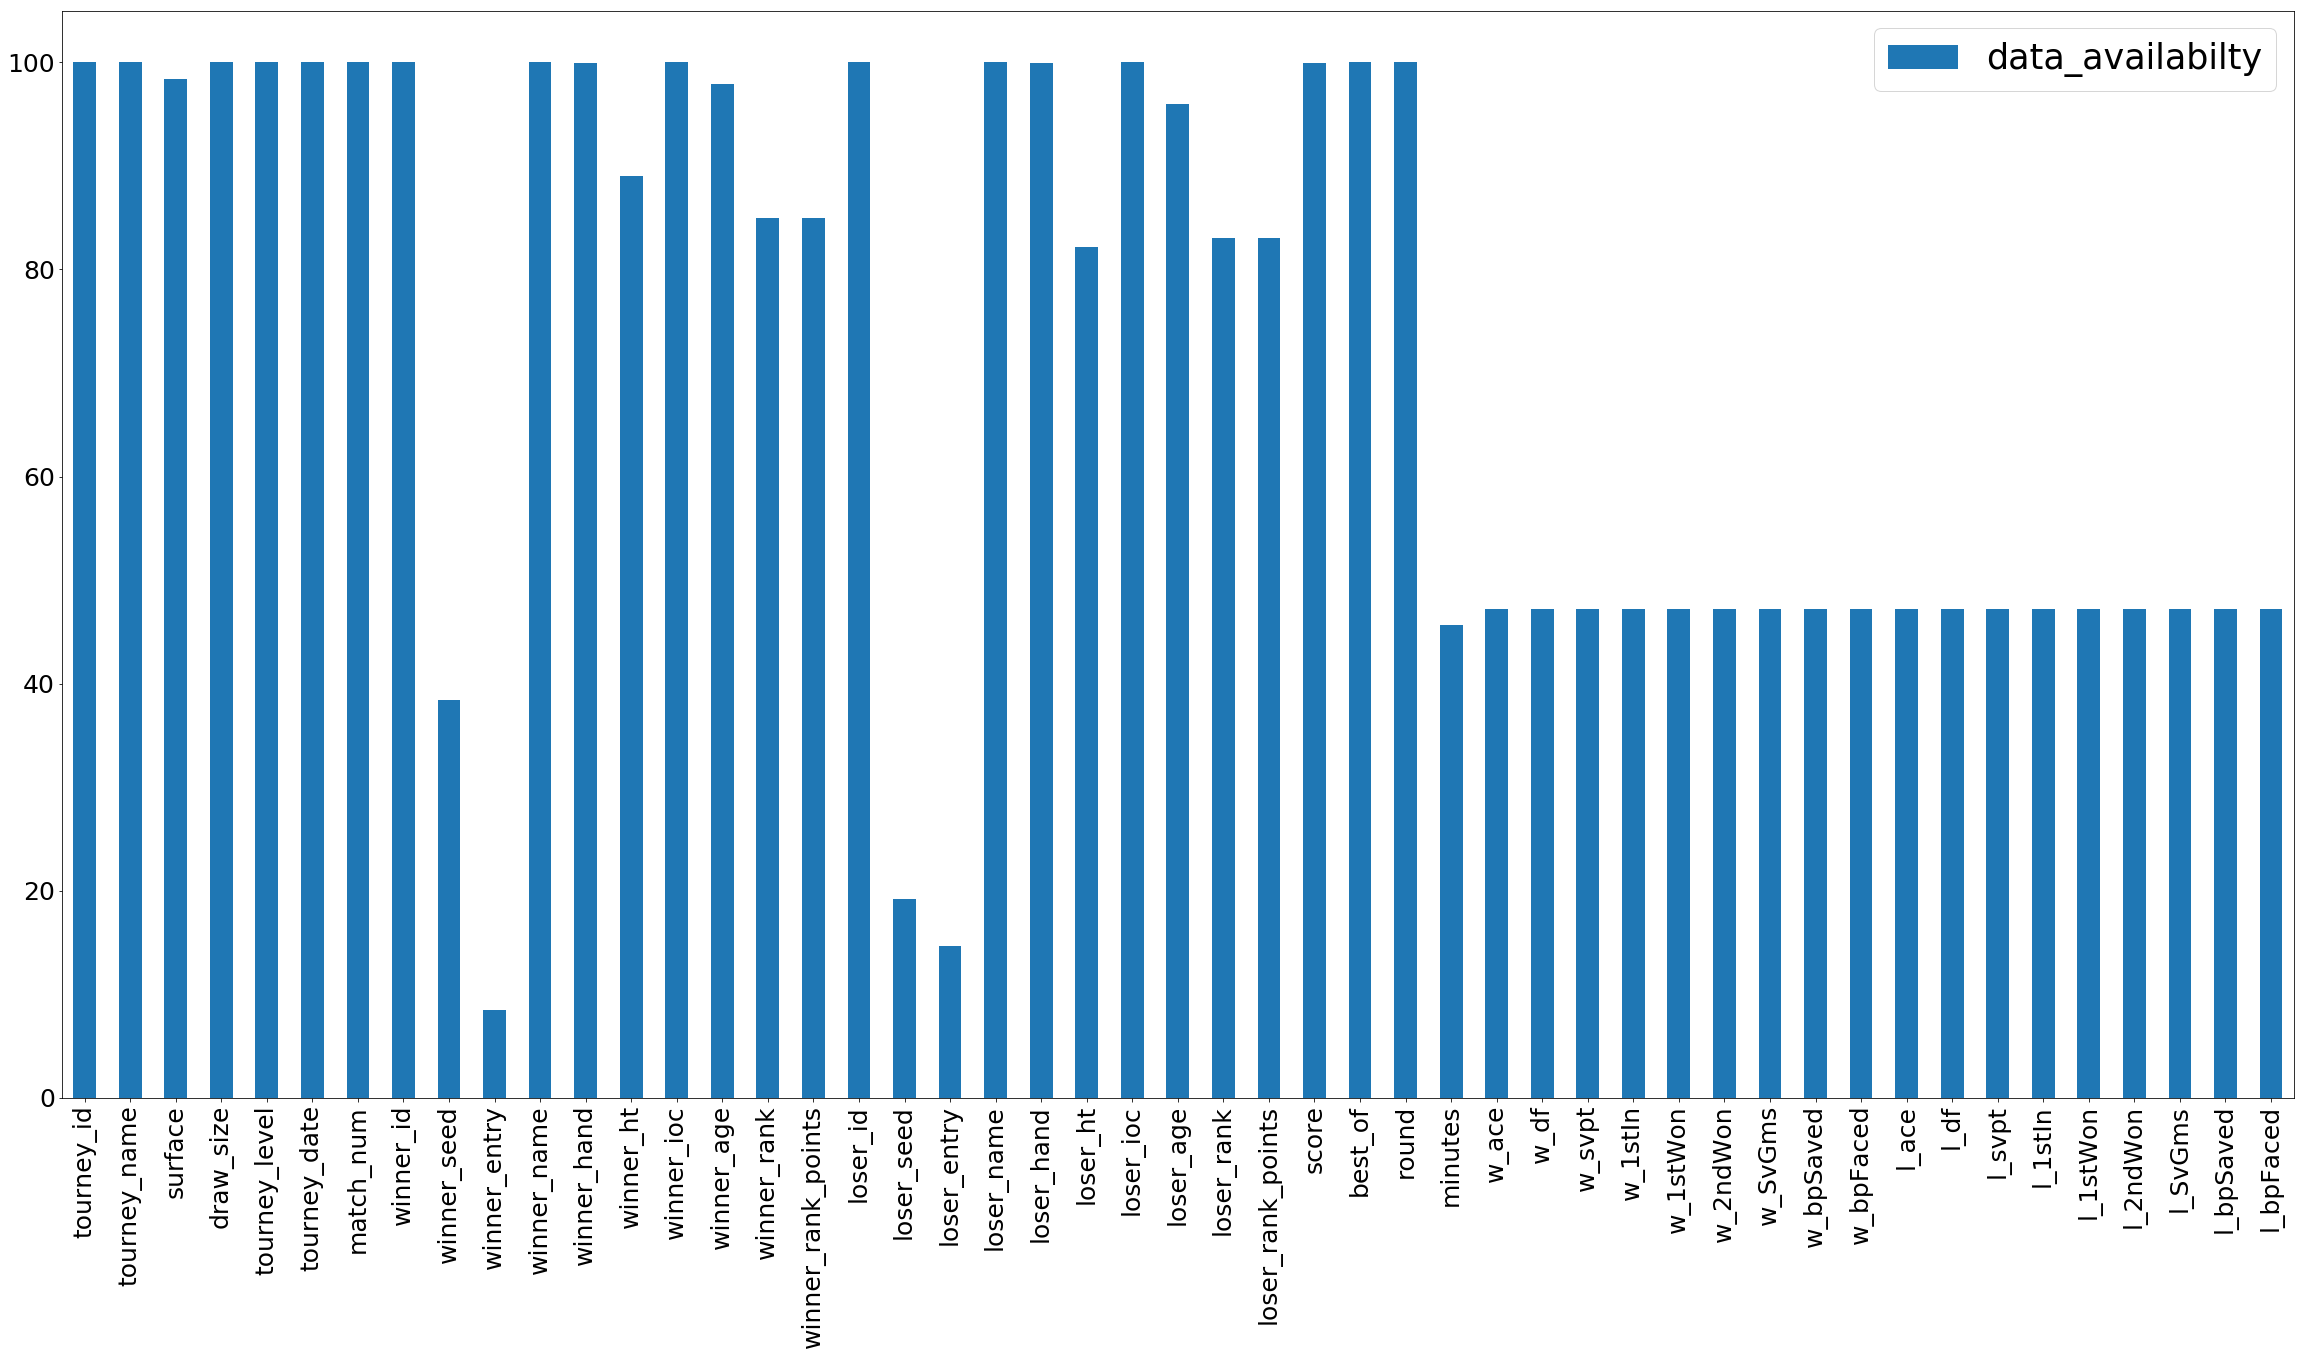

In [13]:
df_availabilty.plot(kind='bar')

In [14]:
# calcul de la densité de disponibilté des données par observation
max_of_columns=df_apt.shape[1]
df_availabilty_per_row=pd.DataFrame(100*df_apt.count(axis=1)/max_of_columns,columns=['df_availabilty_per_row'])

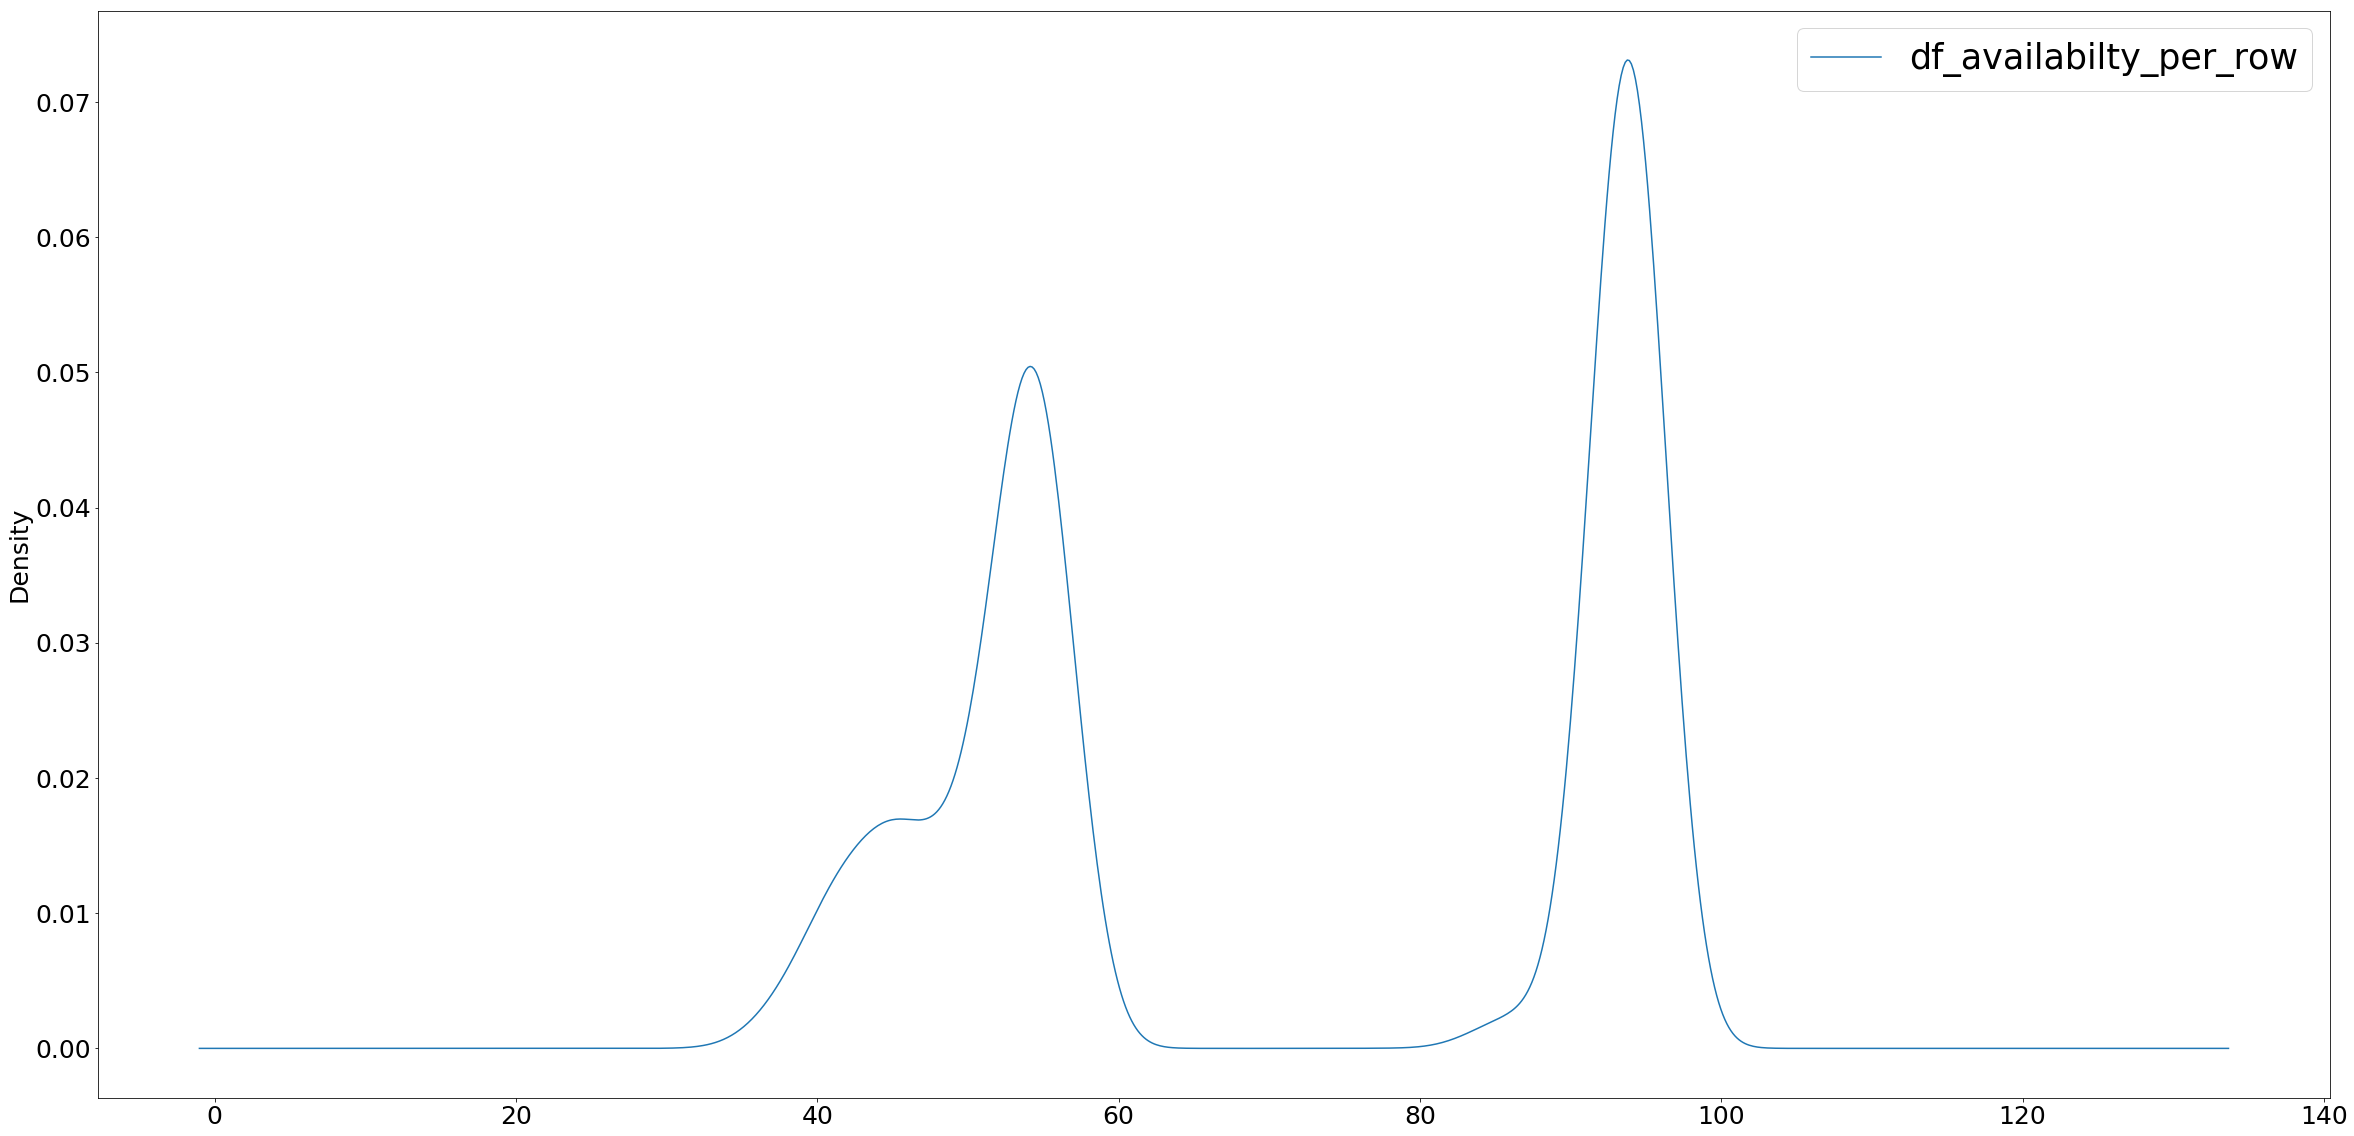

In [15]:
df_availabilty_per_row.plot(kind='kde')

In [16]:
df_apt['tourney_date']=pd.to_datetime(df_apt['tourney_date'],format='%Y%m%d',errors='coerce')

In [17]:
df_apt['Year']=df_apt['tourney_date'].dt.year

In [18]:
df_availabilty_per_row.index=df_apt['tourney_date']

In [19]:
df_availabilty_per_row_per_day=df_availabilty_per_row.groupby(['tourney_date']).aggregate({'df_availabilty_per_row':'mean'})
df_availabilty_per_row_per_day.columns=['mean_of_availabilty_per_row_per_day']

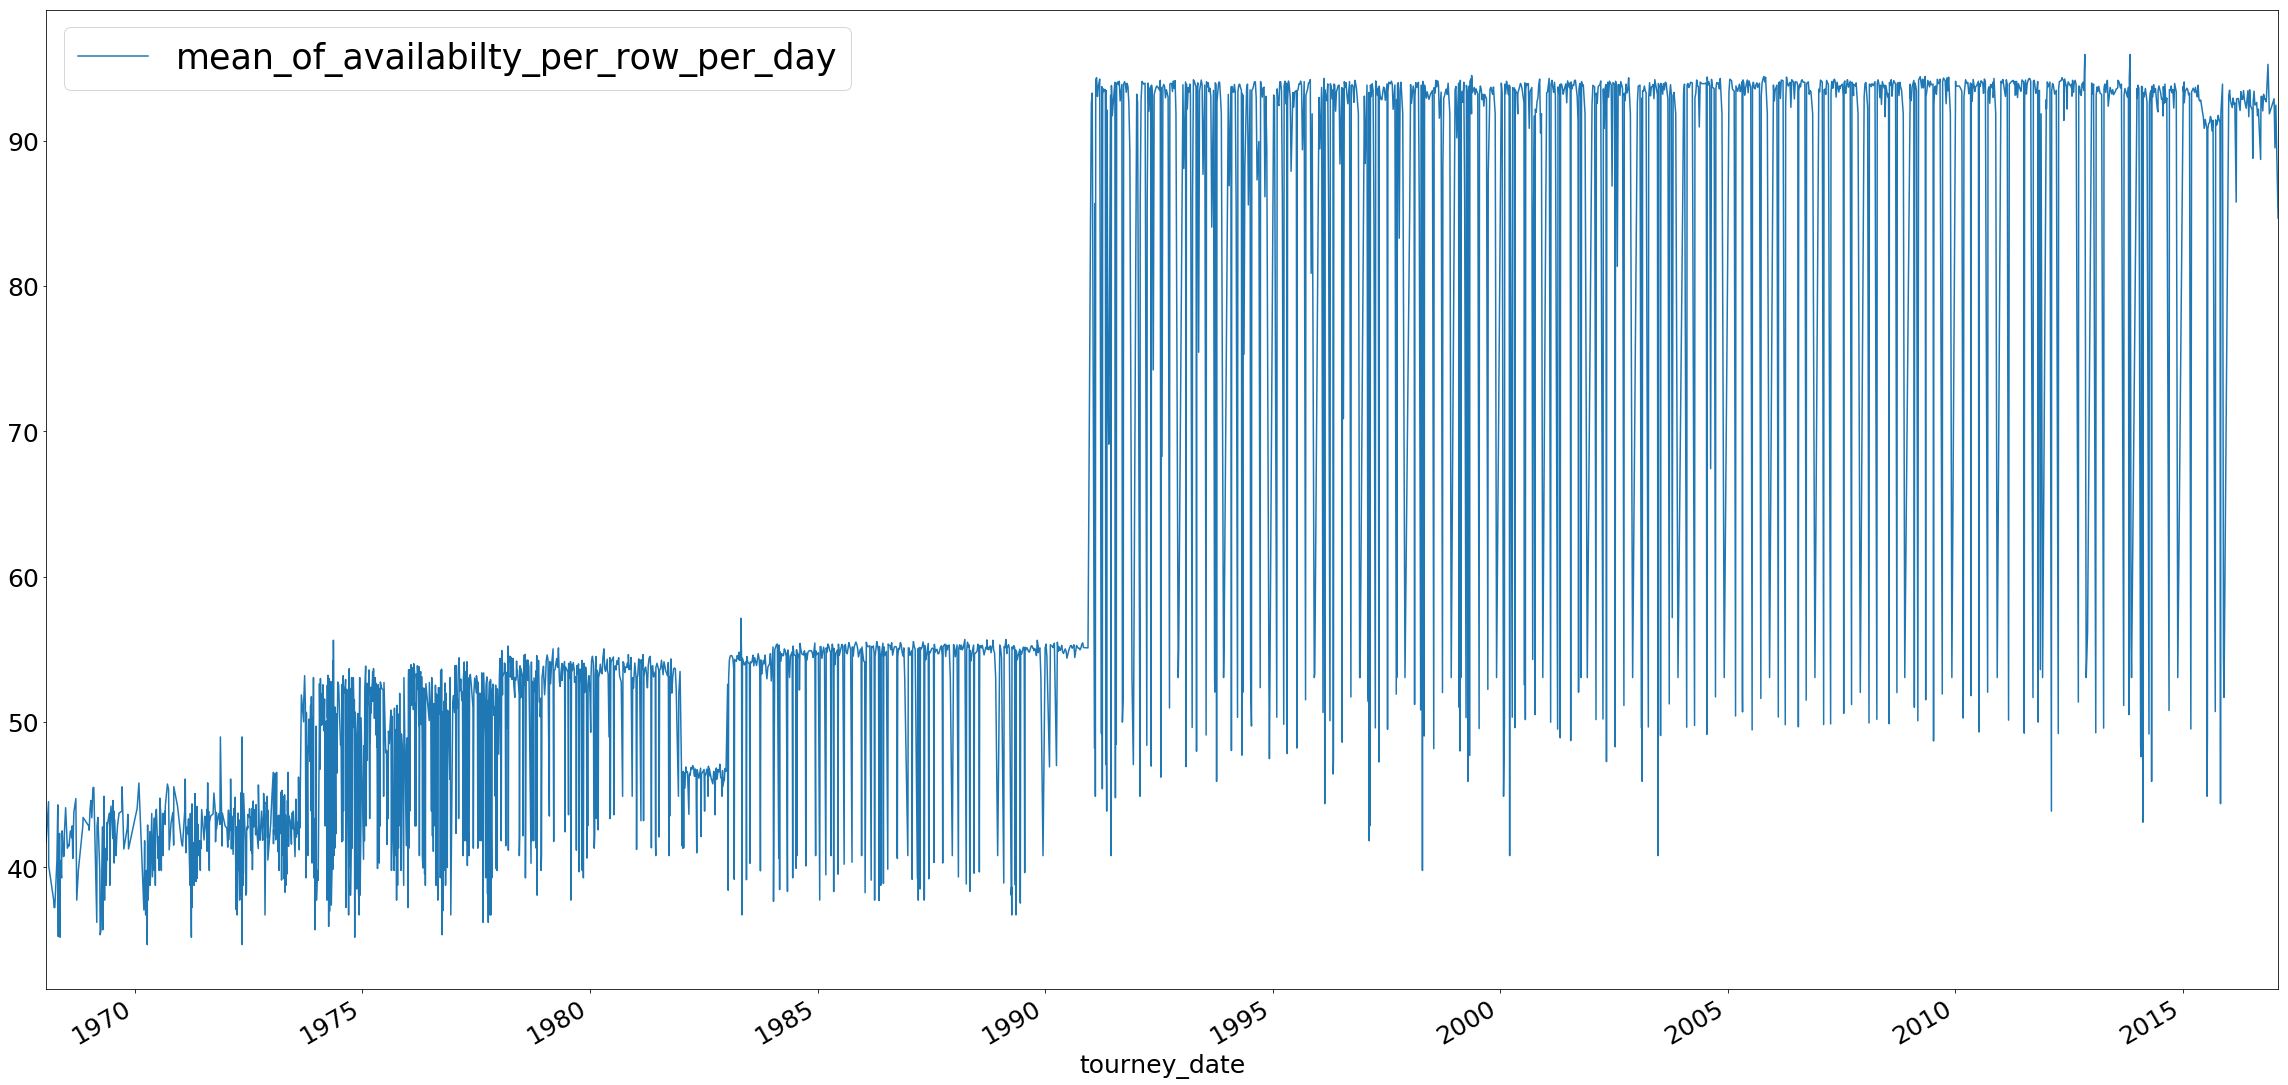

In [20]:
df_availabilty_per_row_per_day.plot()

In [21]:
df_availabilty_per_row_per_day['year']=df_availabilty_per_row_per_day.index.year

In [23]:
df_availabilty_per_row_per_year=df_availabilty_per_row_per_day.groupby(['year']).aggregate({'mean_of_availabilty_per_row_per_day':'mean'})

In [24]:
df_availabilty_per_row_per_year.columns=['mean_of_availabilty_per_row_per_day']

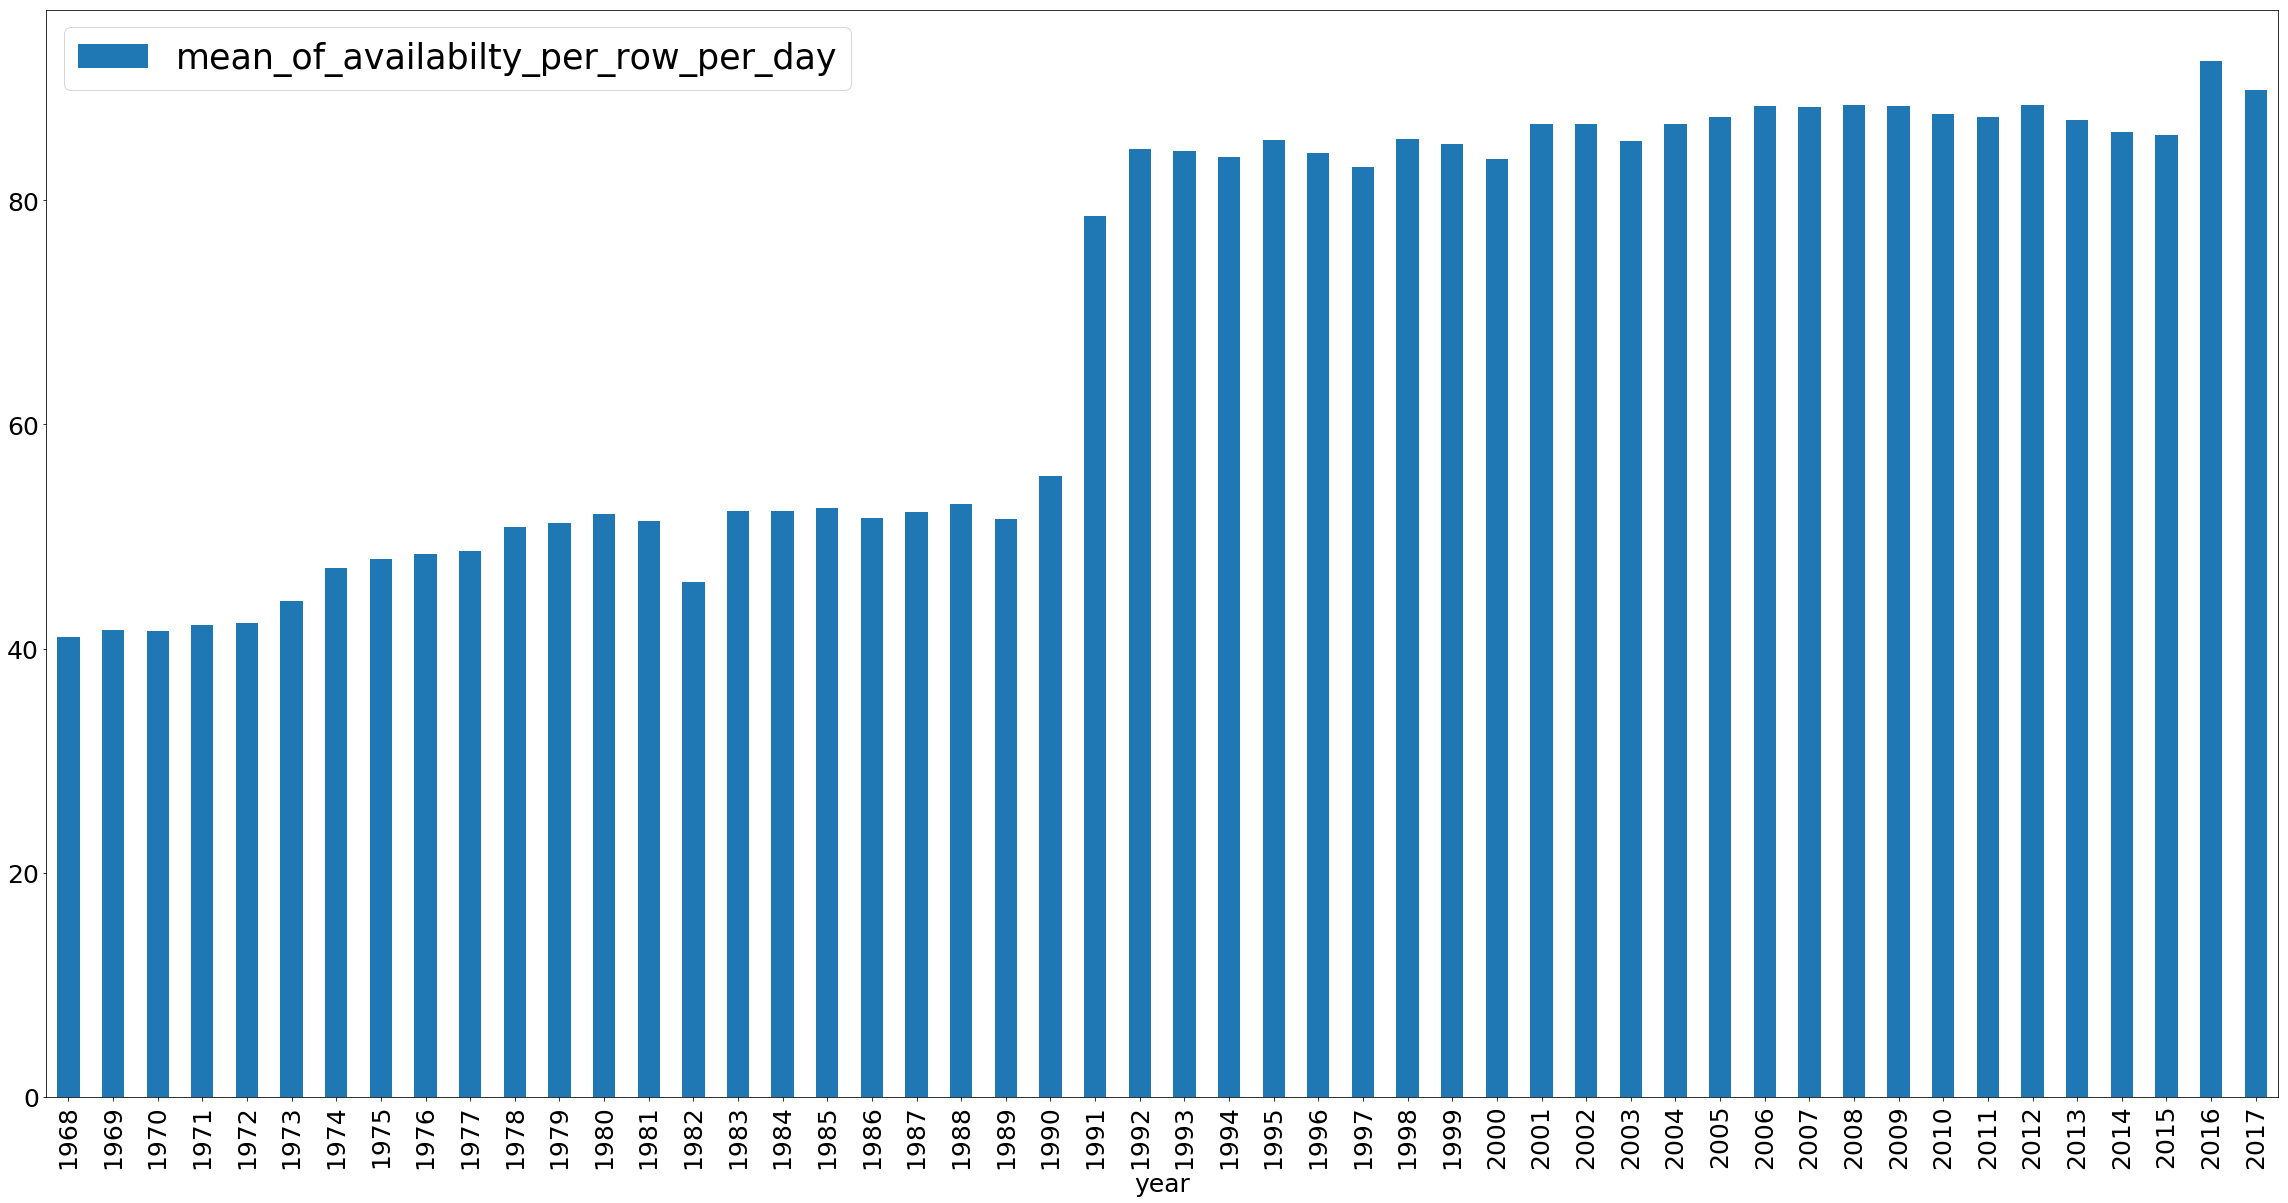

In [25]:
df_availabilty_per_row_per_year.plot(kind='bar')